<a href="https://colab.research.google.com/github/fersilverio/A-Star-MOA/blob/master/redes-neurais-artificiais/entregas/bloco%205/fernando_variacao_valores_MLPRegressor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Considerando que no enunciado 1 devo considerar o modeo de rede 1 então considero p = 5.

In [30]:
df = pd.read_csv('/content/drive/MyDrive/RNA_Datasets/variacaoValores.csv')

print(df.head(15))

df_new  = pd.DataFrame(columns=['x-5','x-4', 'x-3', 'x-2', 'x-1', 'x'])
data = df.iloc[:, 1].values
#print(data)

length = len(data)

for i in range(length-5):
  df_new_row = pd.DataFrame({
      'x-5': [data[i]],
      'x-4': [data[i+1]],
      'x-3': [data[i+2]],
      'x-2': [data[i+3]],
      'x-1': [data[i+4]],
      'x': [data[i+5]],
  })

  df_new = pd.concat([df_new, df_new_row], ignore_index=True)

print(df_new)

y = df_new[['x']]
x = df_new.drop('x', axis=1)

print(x)
print(y)

[1.701e-01 1.023e-01 4.405e-01 3.609e-01 7.192e-01 2.258e-01 3.175e-01
 1.270e-02 4.290e-01 5.440e-02 8.000e-01 4.500e-02 4.268e-01 1.120e-02
 3.218e-01 2.185e-01 7.240e-01 3.516e-01 4.420e-01 9.840e-02 1.747e-01
 3.964e-01 5.114e-01 6.183e-01 3.330e-01 2.398e-01 5.080e-02 4.497e-01
 2.178e-01 7.762e-01 1.078e-01 3.773e-01 1.000e-04 3.877e-01 8.210e-02
 7.836e-01 1.887e-01 4.483e-01 4.240e-02 2.539e-01 3.164e-01 6.386e-01
 4.862e-01 4.068e-01 1.611e-01 1.101e-01 4.372e-01 3.795e-01 7.092e-01
 2.400e-01 3.087e-01 1.590e-02 4.330e-01 7.330e-02 7.995e-01 2.620e-02
 4.223e-01 8.500e-03 3.303e-01 2.037e-01 7.332e-01 3.328e-01 4.445e-01
 9.090e-02 1.838e-01 3.888e-01 5.277e-01 6.042e-01 3.435e-01 2.304e-01
 5.680e-02 4.500e-01 2.371e-01 7.705e-01 1.246e-01 3.701e-01 6.000e-04
 3.943e-01 6.460e-02 7.878e-01 1.694e-01 4.468e-01 3.720e-02 2.632e-01
 3.048e-01 6.516e-01 4.690e-01 4.132e-01 1.523e-01 1.182e-01 4.334e-01
 3.978e-01 6.987e-01 2.538e-01 2.998e-01 1.950e-02 4.366e-01 9.240e-02
 7.984

<ipython-input-30-4b791988d264>:21: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_new = pd.concat([df_new, df_new_row], ignore_index=True)


In [44]:
trainX, testX, trainY, testY = x[0:100], x[101:120], y[0:100], y[101:120]

y_pred = mlp_reg.predict(testX)

Definindo parametros (enunciado 1) para o MLPRegressor

In [45]:
mlp_reg = MLPRegressor(
    hidden_layer_sizes=(15),
    activation='relu',
    solver='sgd',
    max_iter=5000,
    tol=0.000001,
    momentum=0.9,
    early_stopping=True,
    epsilon=1e-06,
    learning_rate_init=0.001,
    learning_rate='constant'
)

mlp_reg.fit(trainX, trainY)

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1645: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPRegressor(early_stopping=True, epsilon=1e-06, hidden_layer_sizes=15,
             max_iter=5000, solver='sgd', tol=1e-06)

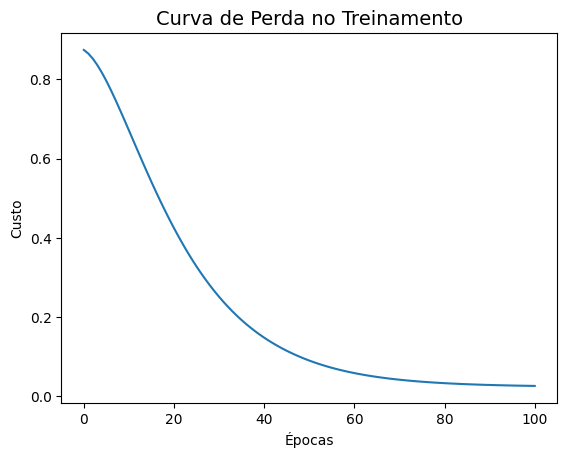

In [46]:
plt.plot(mlp_reg.loss_curve_) # Plotando o gráfico de erros no processo de treinamento - o loss_curve_ só funciona com o adam
plt.title("Curva de Perda no Treinamento", fontsize=14)
plt.xlabel('Épocas')
plt.ylabel('Custo')
plt.show()

In [48]:
print('Epochs: ', mlp_reg.n_iter_)
print('Loss: ', mlp_reg.loss_)
print('Mean Absolute Error (MAE): ', metrics.mean_absolute_error(testY, y_pred)) # Variação de 0 ao infinito. Quanto menor, melhor.
print('Mean Squared Error (MSE): ', metrics.mean_squared_error(testY, y_pred)) # Variação de 0 ao infinito. Quanto menor, melhor.
print('Root Mean Squared Error (RMSE): ', metrics.mean_squared_error(testY, y_pred)) # Variação de 0 ao infinito. Quanto menor, melhor.
print('R2 Score: ', metrics.r2_score(testY, y_pred)) # Apresenta em porcentagem de erros em relação ao desejado.

Epochs:  101
Loss:  0.026687349982512282
Mean Absolute Error (MAE):  0.07300393919566155
Mean Squared Error (MSE):  0.007048009634797742
Root Mean Squared Error (RMSE):  0.007048009634797742
R2 Score:  0.815165910806665
